# 2. Linear regression

First, make sure you've installed `cofi`: (Check the README.md file for furthur instructions)

```bash
pip install cofi
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cofi

/usr/local/anaconda3/envs/cofi_test/lib/python3.9/site-packages/cofi/optimizers/_petsc_tao.py:11: UserWarning: Please install petsc4py if you'd like to use its solvers
  warnings.warn("Please install petsc4py if you'd like to use its solvers")


It's normal if you see a warning about other packages like `petsc4py`. They are optional dependencies of `cofi`, and you need to install them accordingly if you'd like to use solvers built on them.

To get full dependency while installing `cofi`, use the command:
```console
pip install cofi[all]
```

----

Remember the concepts of "objective" and "solver" we mentioned in section 1? Here we use an example "objective" class - `LinearFittingObjective`, and an example "solver" class - `LRNormalEquation`. They are both now included in this package.

### Step 1: import

In [2]:
from cofi.cofi_objective import LinearFittingObjective
from cofi.linear_reg import LRNormalEquation

### Step 2: generate sample data

In [3]:
true_model = [3, 2, 5]
npts = 25
xpts = np.random.uniform(0, 1, npts)

def calc_design_matrix(xpts):
    return np.array([xpts ** i for i in range(3)]).T

def polynomial_forward(xpts, true_model):
    nparams = np.asarray(true_model).shape[0]
    design_matrix = calc_design_matrix(xpts)
    return design_matrix @ true_model
    
ypts = polynomial_forward(xpts, true_model)
ypts = ypts + np.random.normal(0, 0.5, size=npts)

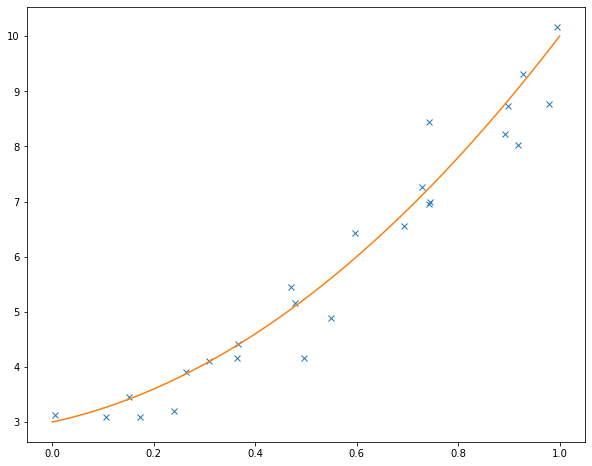

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(xpts, ypts, "x")
plt.plot(np.linspace(0, 1, 100), polynomial_forward(np.linspace(0,1,100), true_model))
plt.show()

### Step 3: define objective

In [5]:
linear_obj = LinearFittingObjective(xpts, ypts, 3, calc_design_matrix)

### Step 4: solve

In [6]:
linear_solver = LRNormalEquation(linear_obj)
model = linear_solver.solve()
print(model.values())

[2.79563597 2.59232428 4.30396606]


/usr/local/anaconda3/envs/cofi_test/lib/python3.9/site-packages/cofi/linear_reg/_utils.py:6: UserWarning: You are using linear regression formula solver, please note that this is only for small scale of data
  warn(


----